In [26]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [27]:
df = pd.read_csv('ihhl_udalguri.csv')

In [28]:
df.head()

,StateName,DistrictName,blockName,GramPanchayatName,IHHLTotalAsPerDetails,IHHLTotalAch
0,Assam,UDALGURI,ODALGURI,KHOWRANG VCDC,1386,645
1,Assam,UDALGURI,ODALGURI,AMJULI VCDC,2204,1051
2,Assam,UDALGURI,ODALGURI,SONAIGAON VCDC,2448,1098
3,Assam,UDALGURI,ODALGURI,MERBANGCHUBA VCDC,1397,1165
4,Assam,UDALGURI,BHERGAON,HAHCHARA VCDC,1015,366


# Cleaning the data

In [29]:
#removing the columns StateName and DistrictName since the data set is only for a single district in a state.
df.drop(['StateName','DistrictName'],axis=1,inplace=True)

In [30]:
#removing the VCDC at the end of every entry in the column GramPanchayatName to make the column look cleaner.
df['GramPanchayatName'] = df.GramPanchayatName.str.replace('VCDC' , '')

# Analysis

The difference between the number of toilets as per details and the actual number will give some valuable information

In [31]:
df['Difference'] = df['IHHLTotalAsPerDetails'] - df['IHHLTotalAch']

In [32]:
df.head()

,blockName,GramPanchayatName,IHHLTotalAsPerDetails,IHHLTotalAch,Difference
0,ODALGURI,KHOWRANG,1386,645,741
1,ODALGURI,AMJULI,2204,1051,1153
2,ODALGURI,SONAIGAON,2448,1098,1350
3,ODALGURI,MERBANGCHUBA,1397,1165,232
4,BHERGAON,HAHCHARA,1015,366,649


In [33]:
df['Difference'].mean()

689.2631578947369

There is a huge difference in the number of toilets as per details and the actual number , with a mean of 690 

In [34]:
df.loc[df['Difference'].idxmax()]

blockName                KALAIGAON
GramPanchayatName           GERUA 
IHHLTotalAsPerDetails         2311
IHHLTotalAch                   454
Difference                    1857
Name: 69, dtype: object

In [35]:
df.loc[df['Difference'].idxmin()]

blockName                      BHERGAON
GramPanchayatName        PASCHIM PATLA 
IHHLTotalAsPerDetails               639
IHHLTotalAch                        602
Difference                           37
Name: 19, dtype: object

The highest difference was in the gram panchayat of Gerua in Kalaigaon block, while the minimum difference was in Paschim Patla in Bhergaon block.
Now, to look how at the differences in each block;


In [36]:
df['Sum of the differences'] = df.groupby('blockName')[['Difference']].transform(sum)

In [37]:
df.sort_values('blockName')

,blockName,GramPanchayatName,IHHLTotalAsPerDetails,IHHLTotalAch,Difference,Sum of the differences
113,BECHIMARI,DALAKATII BOROBAZAR,2618,1959,659,1083
85,BECHIMARI,GERUA,1942,1518,424,1083
19,BHERGAON,PASCHIM PATLA,639,602,37,12228
20,BHERGAON,RAJAGARH,1102,591,511,12228
21,BHERGAON,NO. 1 SONAJULI,1615,321,1294,12228
49,BHERGAON,NAGACHUBA,980,634,346,12228
78,BHERGAON,JABANGAPATHAR,595,503,92,12228
77,BHERGAON,ORENGAJULI,986,401,585,12228
76,BHERGAON,KHAGRABARI,1270,839,431,12228
64,BHERGAON,BHOLATAR,556,442,114,12228


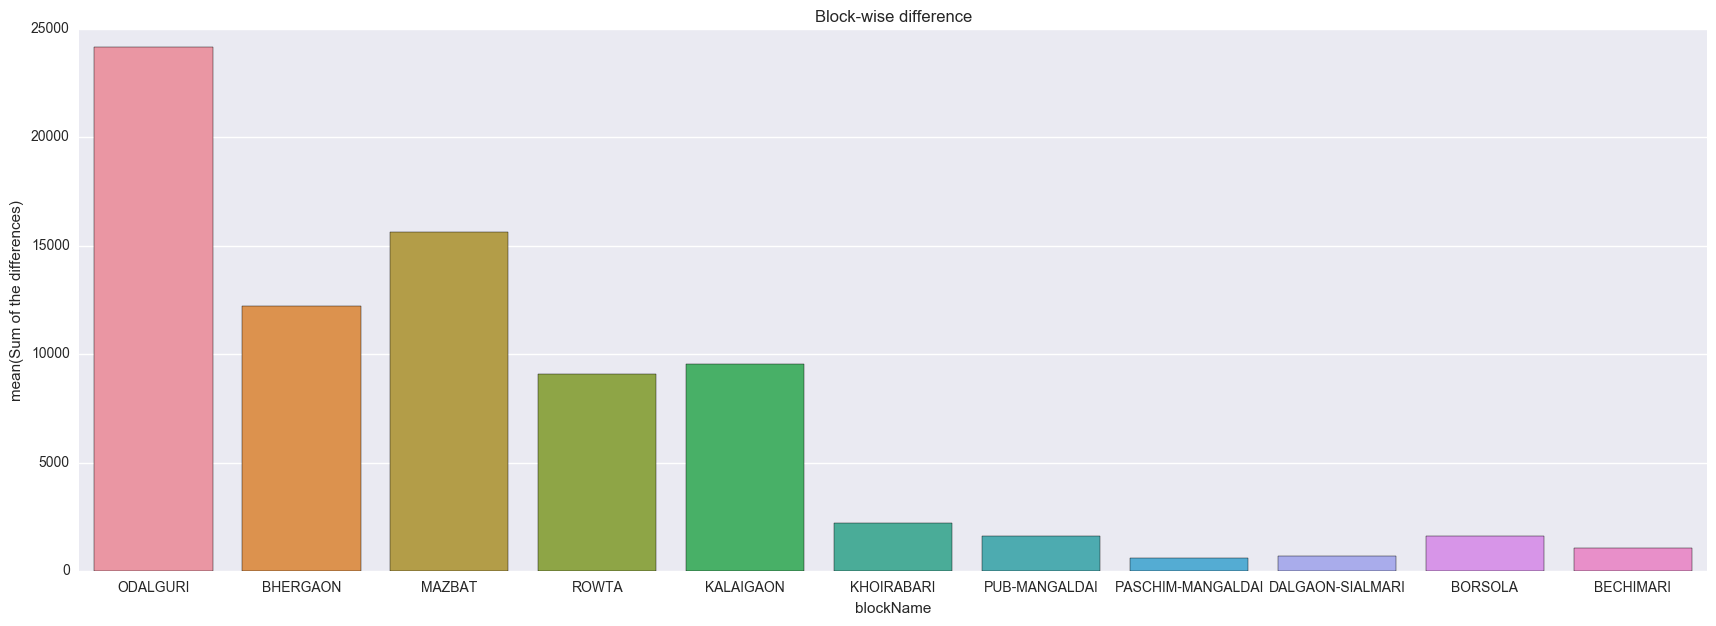

In [38]:
plt.figure(figsize=(21,7))
plt.title('Block-wise difference')
sns.barplot(x='blockName',y='Sum of the differences',data=df)

The block of Odalguri has a very high difference compared to blocks like Paschim-Mangaldai and Dalgaon-Sialmari. 
One reason might be the size of the block. Since the size of each block is not given, it can be assumed that higher the number of gram Panchayats in a block, greater is the area of the block.

In [39]:
df['Number of Gram Panchayats'] = df.groupby('blockName')['GramPanchayatName'].transform('count')
df.sort_values('blockName')

,blockName,GramPanchayatName,IHHLTotalAsPerDetails,IHHLTotalAch,Difference,Sum of the differences,Number of Gram Panchayats
113,BECHIMARI,DALAKATII BOROBAZAR,2618,1959,659,1083,2
85,BECHIMARI,GERUA,1942,1518,424,1083,2
19,BHERGAON,PASCHIM PATLA,639,602,37,12228,26
20,BHERGAON,RAJAGARH,1102,591,511,12228,26
21,BHERGAON,NO. 1 SONAJULI,1615,321,1294,12228,26
49,BHERGAON,NAGACHUBA,980,634,346,12228,26
78,BHERGAON,JABANGAPATHAR,595,503,92,12228,26
77,BHERGAON,ORENGAJULI,986,401,585,12228,26
76,BHERGAON,KHAGRABARI,1270,839,431,12228,26
64,BHERGAON,BHOLATAR,556,442,114,12228,26


Now, comparing the differences with the block size ; 

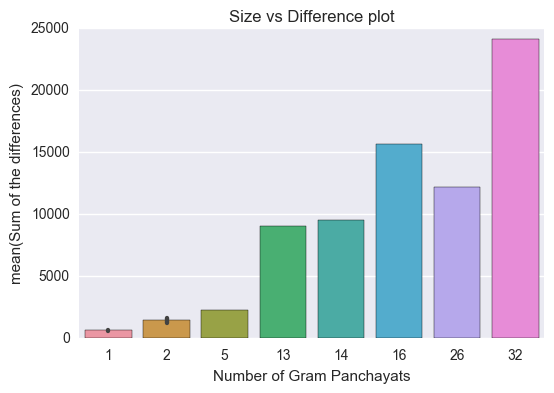

In [40]:
plot=sns.barplot(x='Number of Gram Panchayats',y='Sum of the differences',data=df)
plt.title('Size vs Difference plot')

In [41]:
df.loc[df['Number of Gram Panchayats'] == 26].head(1)

,blockName,GramPanchayatName,IHHLTotalAsPerDetails,IHHLTotalAch,Difference,Sum of the differences,Number of Gram Panchayats
4,BHERGAON,HAHCHARA,1015,366,649,12228,26


It can be seen that there is almost a direct relation between the size of the block and the differences in toilets, expect for the block with count 26 ( Bhergaon ). Thus , it can be concluded that greater the size of  block, more is the difference. 